# Análise dos dados de doenças do coração

## Tratamento dos dados

Para iniciar, usaremos as seguintes bibliotecas do Python:

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Para a análise dos dados clinicos dos pacientes utilizaremos a base de dados disponibilizadas em aulas.

Primeiramente, vamos ler os dados do nosso repositório:

In [10]:
df = pd.read_excel('heart_disease.xlsx', 'data')

df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


Como podemos ver, temos algumas características relacionadas a cada paciente. Através desses dados tentaremos traçar algumas variáveis explicativas para doença no coração.

## Estatistica descritiva básica

Como olharemos apenas os dados dos clientes pessoa física, vamos filtrar o DataFrame.

In [34]:
df_pf = df[df['cliente'] == 'PF' ]

Selecionaremos apenas as colunas que vamos utilizar na confecção dos gráficos e ordenaremos as colunas nos seguintes moldes:

In [35]:
df_pf = df_pf[[ 'data_base', 'uf',
               'ocupacao','porte',
               'modalidade','carteira_ativa',
               'vencido_acima_de_15_dias']]

Como faremos uma análise global, não nos interessa especificar cada operação de crédito. Por conta disso, agruparemos os dados através da função groupby() para somar as variáveis quantitativas com as mesmas características de classificação.

In [36]:
df_pf_1 = df_pf.groupby(['data_base', 'uf', 'ocupacao', 'porte', 'modalidade'], as_index=False)[['carteira_ativa', 'vencido_acima_de_15_dias']].apply(sum)

Para complementar os dados, faremos o cálculo da taxa de inadimplência, através da divisão da quantidade de crédito vencido mais de 15 dias pela carteira de crédito ativa.

In [37]:
df_pf_1['inad_perc'] = df_pf_1['vencido_acima_de_15_dias']/df_pf_1['carteira_ativa']

Por fim, faremos o download das DataFrames para o nosso diretório.

In [38]:
df.to_csv ('df.csv', index = False)

df_pf_1.to_csv ('df_pf_1.csv', index = False)


## Estatística descritiva básica

Nessa seção faremos uma breve análise gráfica dos dados disponibilizados pelo banco central.

Buscando responder quais os estados do país com maior carteira de crédito, vamos elaborar um gráfico de barra utilizando a variável "carteira_ativa".

Primeiramente faremos uma breve manipulação dos dados:

In [41]:
data_plot_df_1 = df_pf_1.groupby(['data_base', 'uf'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].apply(sum).sort_values(by=['carteira_ativa'])

data_plot_df_1 = data_plot_df_1.pivot(index='uf',
                                      columns='data_base',
                                      values= 'carteira_ativa').reset_index().sort_values(by=['2022-07-31'])

Elaboração do gráfico das maiores carteiras de crédito por estado do Brasil:

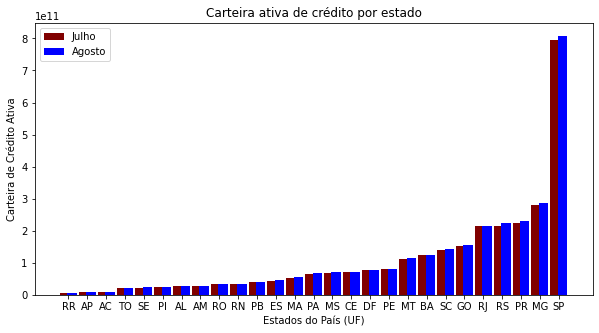

In [42]:
x = list(data_plot_df_1['uf'])
x_axis = np.arange(len(x))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(x_axis - 0.2,
        data_plot_df_1['2022-07-31'],
        color ='maroon',
        width = 0.50,
        label = "Julho")
plt.bar(x_axis + 0.2,
        data_plot_df_1['2022-08-31'],
        color ='blue',
        width = 0.50,
        label = "Agosto")
plt.xticks(x_axis, x)
plt.xlabel('Estados do País (UF)')
plt.ylabel('Carteira de Crédito Ativa')
plt.title('Carteira ativa de crédito por estado')
plt.legend()
plt.show()

Podemos ver uma concentração do crédito nos estados mais ricos do país, mas com maior volume em São Paulo.

De um julho a agosto é possível perceber um pequeno aumento do crédito, mas sem nenhuma grande mudança.

Agora elaboraremos o gráfico com a taxa de inadimplência  nos estados.

In [43]:
data_plot_df_2 = df_pf_1.groupby(['data_base', 'uf'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].sum()

data_plot_df_2['inad_perc'] = data_plot_df_2['vencido_acima_de_15_dias']/data_plot_df_2['carteira_ativa']

data_plot_df_2 = data_plot_df_2.pivot(index='uf',
                                      columns='data_base',
                                      values= 'inad_perc').reset_index().sort_values(by=['2022-07-31'])


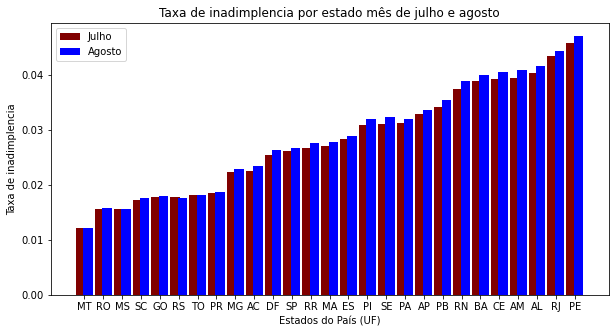

In [44]:
x = list(data_plot_df_2['uf'])
x_axis = np.arange(len(x))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(x_axis - 0.2,
        data_plot_df_2['2022-07-31'],
        color ='maroon',
        width = 0.50,
        label = 'Julho')
plt.bar(x_axis + 0.2,
        data_plot_df_2['2022-08-31'],
        color ='blue',
        width = 0.50,
        label = 'Agosto')
plt.xticks(x_axis, x)
plt.xlabel('Estados do País (UF)')
plt.ylabel('Taxa de inadimplencia')
plt.title('Taxa de inadimplencia por estado mês de julho e agosto')
plt.legend()
plt.show()

O gráfico acima é interessante que inverte a ordem dos estados. Agora, estados com renda per capita menores tomam a dianteira no quesito taxa de inadimplência.

O destaque negativo é o rio de janeiro, pois possui uma das maiores carteiras de crédito do pais e altos indicies de inadimplência.

O próximo gráfico mostrará o tamanho da carteira de crédito por ocupação.

In [45]:

data_plot_df_3 = df_pf_1.groupby(['data_base', 'ocupacao'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].sum()

data_plot_df_3 = data_plot_df_3.pivot(index='ocupacao',
                                      columns='data_base',
                                      values= 'carteira_ativa').sort_values(by=['2022-07-31']).reset_index()


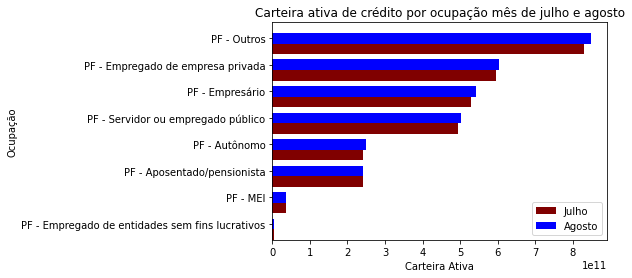

In [46]:
x = list(data_plot_df_3['ocupacao'])
x_axis = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()
ax.barh(x_axis, data_plot_df_3['2022-07-31'], width, color='maroon', label='Julho')
ax.barh(x_axis + width, data_plot_df_3['2022-08-31'], width, color='blue', label='Agosto')
ax.set(yticks = x_axis + width,
       yticklabels = data_plot_df_3['ocupacao'],
       ylim = [2*width - 1, len(x)])
plt.xlabel('Carteira Ativa')
plt.ylabel('Ocupação')
plt.title('Carteira ativa de crédito por ocupação mês de julho e agosto')
ax.legend()
plt.show()

Como podemos ver, existe um alto nível de crédito cedido servidores públicos, privados, empresários e outras profissões não identificadas.

Como já vimos nos outros dois gráficos acima, de julho para agosto ocorreu um leve aumento do crédito de modo geral.

Ainda sobre a ocupação, elaboramos a taxa de inadimplência.

In [47]:
data_plot_df_4 = df_pf_1.groupby(['data_base', 'ocupacao'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].sum()

data_plot_df_4['inad_perc'] = data_plot_df_4['vencido_acima_de_15_dias']/data_plot_df_4['carteira_ativa']

data_plot_df_4 = data_plot_df_4.pivot(index='ocupacao',
                                      columns='data_base',
                                      values= 'inad_perc').reset_index().sort_values(by=['2022-07-31'])


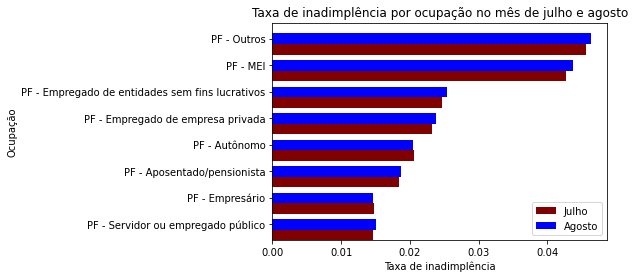

In [48]:
x = list(data_plot_df_4['ocupacao'])
x_axis = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()
ax.barh(x_axis, data_plot_df_4['2022-07-31'], width, color='maroon', label='Julho')
ax.barh(x_axis + width, data_plot_df_4['2022-08-31'], width, color='blue', label='Agosto')
ax.set(yticks = x_axis + width,
       yticklabels = data_plot_df_4['ocupacao'],
       ylim = [2*width - 1, len(x)])
plt.xlabel('Taxa de inadimplência')
plt.ylabel('Ocupação')
plt.title('Taxa de inadimplência por ocupação no mês de julho e agosto')
ax.legend()
plt.show()

O interessante é o altíssimo índice de inadimplência entre os Micro Empreendedores Individuais - MEI - e dos trabalhadores de fundações e ONGS. Consequentemente, a parcela de crédito para esse nicho de mercado não representa parte muito grande do mercado.

A alta inadimplência entre trabalhadores com ocupação "outros", é mais preocupante, pois é a maior carteira de crédito do mercado.

O próximo gráfico tem relação com a renda dos clientes. A variável 'porte', sem dúvida nenhuma, é a mais importante para a análise de crédito.

Primeiramente veremos o tamanho das carteiras de crédito ativas em relação a renda.


In [49]:
data_plot_df_5 = df_pf_1.groupby(['data_base', 'porte'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].sum()

data_plot_df_5 = data_plot_df_5.pivot(index='porte',
                                      columns='data_base',
                                      values= 'carteira_ativa').sort_values(by=['2022-07-31']).reset_index()

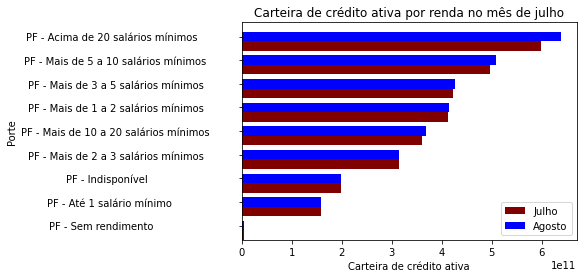

In [50]:
x = list(data_plot_df_5['porte'])
x_axis = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()
ax.barh(x_axis, data_plot_df_5['2022-07-31'], width, color='maroon', label='Julho')
ax.barh(x_axis + width, data_plot_df_5['2022-08-31'], width, color='blue', label='Agosto')
ax.set(yticks = x_axis + width,
       yticklabels = data_plot_df_5['porte'],
       ylim = [2*width - 1, len(x)])
plt.xlabel('Carteira de crédito ativa')
plt.ylabel('Porte')
plt.title('Carteira de crédito ativa por renda no mês de julho')
ax.legend()
plt.show()

O que vemos através do gráfico acima é uma forte relação entre renda e tamanho da carteira ativa no mercado. Uma exceção interessante são os cliente entre 10 e 20 salários mínimos que tem menos participação no mercado de crédito que outros cliente de nível de salários menor.

Já a taxa de inadimplência por nível de renda inverte a ordem do gráfico, já que os menos afortunados terão menor capacidade de honrarem suas certeiras de crédito. Correndo então maior risco de inadimplência

In [51]:
data_plot_df_6 = df_pf_1.groupby(['data_base', 'porte'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].sum()

data_plot_df_6['inad_perc'] = data_plot_df_6['vencido_acima_de_15_dias']/data_plot_df_6['carteira_ativa']

data_plot_df_6 = data_plot_df_6.pivot(index='porte',
                                      columns='data_base',
                                      values= 'inad_perc').sort_values(by=['2022-07-31']).reset_index()


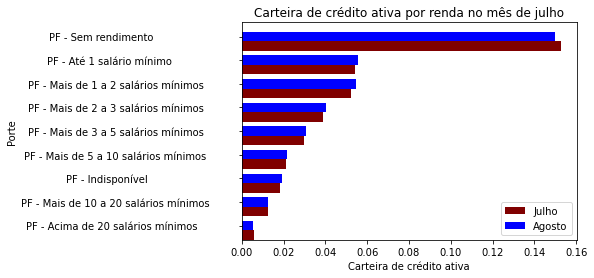

In [52]:
x = list(data_plot_df_6['porte'])
x_axis = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()
ax.barh(x_axis, data_plot_df_6['2022-07-31'], width, color='maroon', label='Julho')
ax.barh(x_axis + width, data_plot_df_6['2022-08-31'], width, color='blue', label='Agosto')
ax.set(yticks = x_axis + width,
       yticklabels = data_plot_df_6['porte'],
       ylim = [2*width - 1, len(x)])
plt.xlabel('Carteira de crédito ativa')
plt.ylabel('Porte')
plt.title('Carteira de crédito ativa por renda no mês de julho')
ax.legend()
plt.show()

Como já esperado, a taxa de inadimplência é maior entre os menores níveis de renda e muito maior entre os indivíduos que não possuem ou não declararam renda.

Por fim, analisaremos a modalidade do crédito, ou seja, tipo de produto vendido ao cliente. Podendo ser cartão de crédito, crédito imobiliário, financiamento veicular, entre outros.

In [53]:
data_plot_df_7 = df_pf_1.groupby(['data_base', 'modalidade'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].sum()

data_plot_df_7 = data_plot_df_7.pivot(index='modalidade',
                                      columns='data_base',
                                      values= 'carteira_ativa').sort_values(by=['2022-07-31']).reset_index()

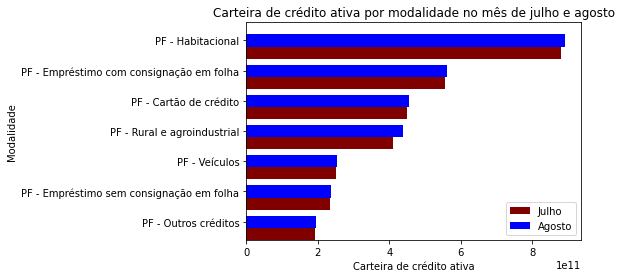

In [54]:
x = list(data_plot_df_7['modalidade'])
x_axis = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()
ax.barh(x_axis, data_plot_df_7['2022-07-31'], width, color='maroon', label='Julho')
ax.barh(x_axis + width, data_plot_df_7['2022-08-31'], width, color='blue', label='Agosto')
ax.set(yticks = x_axis + width,
       yticklabels = data_plot_df_7['modalidade'],
       ylim = [2*width - 1, len(x)])
plt.xlabel('Carteira de crédito ativa')
plt.ylabel('Modalidade')
plt.title('Carteira de crédito ativa por modalidade no mês de julho e agosto')
ax.legend()
plt.show()

Obviamente, o maior volume de empréstimos está relacionado a compra de imóveis. O tamanho da carteira de crédito habitacional tem a ver com os altos valores necessário para compra de imóveis de modo geral.

Empréstimos consignados tem um bom nível de garantia, já que possuem convenio para ser debitados em folha, e também possui uma grande fatia do mercado de crédito.

Agora veremos as taxas de inadimplência entre as diversas modalidades de produtos comercializados.

In [55]:
data_plot_df_8 = df_pf_1.groupby(['data_base', 'modalidade'], as_index = False)[['vencido_acima_de_15_dias',
                                                           'carteira_ativa']].sum()

data_plot_df_8['inad_perc'] = data_plot_df_8['vencido_acima_de_15_dias']/data_plot_df_8['carteira_ativa']

data_plot_df_8 = data_plot_df_8.pivot(index='modalidade',
                                      columns='data_base',
                                      values= 'inad_perc').sort_values(by=['2022-07-31']).reset_index()

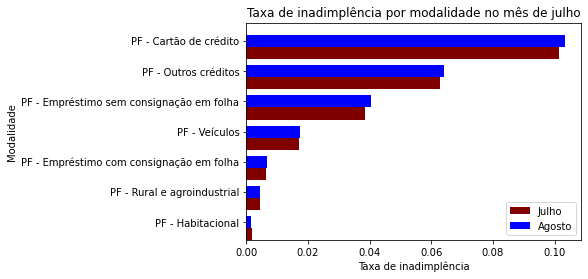

In [56]:
x = list(data_plot_df_8['modalidade'])
x_axis = np.arange(len(x))
width = 0.4
fig, ax = plt.subplots()
ax.barh(x_axis, data_plot_df_8['2022-07-31'], width, color='maroon', label='Julho')
ax.barh(x_axis + width, data_plot_df_8['2022-08-31'], width, color='blue', label='Agosto')
ax.set(yticks = x_axis + width,
       yticklabels = data_plot_df_8['modalidade'],
       ylim = [2*width - 1, len(x)])
plt.xlabel('Taxa de inadimplência')
plt.ylabel('Modalidade')
plt.title('Taxa de inadimplência por modalidade no mês de julho')
ax.legend()
plt.show()

É evidente a grande taxa de inadimplência entre cartões de crédito e outros créditos de modo geral.

Vemos que crédito com garantia real possui um nível de inadimplência significativamente mais baixo


## Modelo de Regressão para explicar a Inadimplência Percentual

Para iniciar a regressão será necessário fazer mais uma breve manipulação dos dados.

Primeriramente a separação entre dados de julho e agosto:

In [58]:
df_pf_07 = df_pf[df_pf['data_base'] == '2022-07-31']
df_pf_08 = df_pf[df_pf['data_base'] == '2022-08-31']

Também será preciso refazer a variável inadimplência percental para o novos DataFrames.

In [59]:
df_pf_07['inad_perc'] = df_pf_07['vencido_acima_de_15_dias'].div(df_pf_07['carteira_ativa'].values)

df_pf_08['inad_perc'] = df_pf_08['vencido_acima_de_15_dias'].div(df_pf_08['carteira_ativa'].values)

C:\Users\myjoa\AppData\Local\Temp\ipykernel_6316\972321856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pf_07['inad_perc'] = df_pf_07['vencido_acima_de_15_dias'].div(df_pf_07['carteira_ativa'].values)
C:\Users\myjoa\AppData\Local\Temp\ipykernel_6316\972321856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pf_08['inad_perc'] = df_pf_08['vencido_acima_de_15_dias'].div(df_pf_08['carteira_ativa'].values)


Agora ajustaremos a variável "operações" para transformar o valor "<15" em um número inteiro, arredondando para 15 operações.

Com isso, conseguiremos obter o valor médio de das operações de crédito por operação, sejam vencidas ou ativas.

In [78]:
df_pf_07.loc[df_pf_07['numero_de_operacoes'] == '<= 15', 'numero_de_operacoes'] = 15
df_pf_07['numero_de_operacoes'] = df_pf_07['numero_de_operacoes'].astype(str).astype(int)

df_pf_08.loc[df_pf_08['numero_de_operacoes'] == '<= 15', 'numero_de_operacoes'] = 15
df_pf_08['numero_de_operacoes'] = df_pf_08['numero_de_operacoes'].astype(str).astype(int)

KeyError: 'numero_de_operacoes'

Cálculo da média de crédito ativo e vencido por operação:

In [61]:
# Média de credito por operacao
df_pf_07['venc_media'] = df_pf_07['vencido_acima_de_15_dias']/df_pf_07['numero_de_operacoes']

df_pf_08['venc_media'] = df_pf_08['vencido_acima_de_15_dias']/df_pf_08['numero_de_operacoes']

# Média de vencido por operacao
df_pf_07['cred_media'] = df_pf_07['carteira_ativa']/df_pf_07['numero_de_operacoes']

df_pf_08['cred_media'] = df_pf_08['carteira_ativa']/df_pf_08['numero_de_operacoes']

NameError: name 'df_pf_07' is not defined

Definiremos as variáveis explicativas do percentual de inadimplência com base nas estatísticas descritivas feitas na secção acima.

In [ ]:
df_pf_07_1 = df_pf_07[['uf','ocupacao','porte', 'modalidade', 'inad_perc', 'venc_media']]

df_pf_08_1 = df_pf_08[['uf','ocupacao','porte', 'modalidade', 'inad_perc', 'venc_media']]

Transformando variáveis de classificação em dummies.

In [ ]:
df_pf_07_dummies = pd.get_dummies(df_pf_07_1)

df_pf_08_dummies = pd.get_dummies(df_pf_08_1)

# Lista com os nomes das colunas (serve para os dois meses)
names = list(df_pf_07_dummies)

Formulando lista com os nomes das colunas (serve para os dois meses).

Variáveis removidas por conta do alto P-valor

In [ ]:
names.remove('inad_perc')
names.remove('porte_PF - Mais de 10 a 20 salários mínimos        ')
names.remove('modalidade_PF - Veículos')
names.remove('uf_GO')
names.remove('uf_CE')
names.remove('uf_ES')
names.remove('uf_RO')
names.remove('uf_TO')
names.remove('ocupacao_PF - Aposentado/pensionista')           
names.remove('ocupacao_PF - Autônomo')
names.remove('ocupacao_PF - Empregado de empresa privada')
names.remove('ocupacao_PF - Servidor ou empregado público')

Determinando variáveis explicativas e dependentes

In [ ]:
X = df_pf_07_dummies[names]
y = df_pf_07_dummies['inad_perc']

Executando modelo de regressão

In [ ]:
# Modelo de regressão
model_1 = sm.OLS(y, X).fit()
model_1.summary()

Rodando as mesmas variáveis do modelo acima, mas agora para agosto

In [ ]:
# Modelo para mês de agosto
XX = df_pf_08_dummies[names]
yy = df_pf_08_dummies['inad_perc']

model_2 = sm.OLS(yy, XX).fit()
model_2.summary()